In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import graphviz
import pydotplus 
from pandas import DataFrame,Series
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

input_folder = "../dataset"

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
movie_file = pd.read_csv(input_folder+"/movie_metadata_cleaned_filled_values.csv")
movie_data= DataFrame(movie_file)
movie_data.fillna(movie_data.mean())
movie_data = movie_data.dropna()

#movie_data.head(10)
#len(movie_data)

In [16]:
drop_predictors = ['gross','worldwide_gross','color','movie_title','director_name',
                   'actor_1_name','actor_2_name','actor_3_name','content_rating',
                   'genres','plot_keywords','movie_imdb_link','country','language',
                   'release_date','title_year','aspect_ratio']

#define predictors and predicted values
X = movie_data.drop(drop_predictors, axis=1)
y = movie_data.worldwide_gross

#### split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # Don't cheat - fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

####standardize data to address different scales.
#standardized_X = preprocessing.scale(X)
#standardized_y = preprocessing.scale(y)

# SGDRegressor is well suited for regression problems with a large number of
# training samples (> 10.000), 
# for other problems we recommend Ridge, Lasso, or ElasticNet.
reg_model = SGDRegressor(penalty='elasticnet', alpha=0.001,
                                  l1_ratio=0.25, fit_intercept=False)

##Train the model using the training sets 
reg_model.fit(X_train, y_train)

SGDRegressor(alpha=0.001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=False, l1_ratio=0.25, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='elasticnet', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

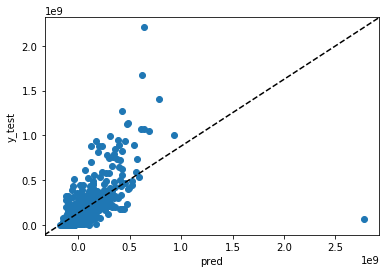

In [17]:
pred = reg_model.predict(X_test)
plt.scatter(pred, y_test, label='worldwide_gross')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')
plt.show()

In [18]:
#Metrics
print("MSE: {0:0.4f}".format(mean_squared_error(y_test, pred)))
print("R2:  {0:0.4f}".format(r2_score(y_test, pred, multioutput='variance_weighted')))

MSE: 35448583786881316.0000
R2:  0.0350
